In [11]:
import os
import utils
import dotenv
import umap
import pandas as pd
import numpy as np
import dataextraction as db
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN, SpectralClustering, KMeans, Birch
import hdbscan

In [2]:
# Loads the environment variables from the .env file
dotenv.load_dotenv()

True

In [3]:
df = pd.read_csv(f'{os.getenv("ROOT_DIR")}\\data\\finalrefined.csv')

In [4]:
df_subject_mr = utils.aggregate_score_to_mortality()
df_subject_mr

Connected to the PostgreSQL database
PostgreSQL version: PostgreSQL 14.0, compiled by Visual C++ build 1914, 64-bit


,subject_id,mr_lods
0,25225,0.104107
1,15574,0.048017
2,52619,0.048017
3,85940,0.048017
4,12411,0.288948
...,...,...
61046,3793,0.149936
61047,11099,0.288948
61048,93831,0.071114
61049,50334,0.104107


In [5]:
df = df.merge(df_subject_mr.drop_duplicates(subset='subject_id'), on='subject_id', how='left')

In [6]:
df['icu_level'] = df['mr_lods'].apply(utils.map_mortality_rate_to_icu_level)
df['icu_level']

0        Level 3
1        Level 1
2        Level 2
3        Level 1
4        Level 1
          ...   
10188    Level 1
10189    Level 1
10190    Level 2
10191    Level 1
10192    Level 1
Name: icu_level, Length: 10193, dtype: object

In [7]:
df["icu_level"].describe()

count       10193
unique          3
top       Level 1
freq         7807
Name: icu_level, dtype: object

In [8]:
columns_to_remove = ["subject_id", "hadm_id", "icustay_id", "mr_lods"]
df = df.drop(columns_to_remove, axis=1)

In [12]:
label_encoder = LabelEncoder()
df["icu_level"] = label_encoder.fit_transform(df["icu_level"])
df["icu_level"]

0        2
1        0
2        1
3        0
4        0
        ..
10188    0
10189    0
10190    1
10191    0
10192    0
Name: icu_level, Length: 10193, dtype: int32

In [13]:
df

,heartrate_mean,sysbp_mean,diasbp_mean,meanbp_mean,resprate_mean,tempc_mean,spo2_mean,glucose_mean,aniongap_mean,bicarbonate_mean,...,discharge_location_REHAB/DISTINCT PART HOSP,discharge_location_SHORT TERM HOSPITAL,discharge_location_SNF,discharge_location_SNF-MEDICAID ONLY CERTIF,insurance_Government,insurance_Medicaid,insurance_Medicare,insurance_Private,insurance_Self Pay,icu_level
0,111.785714,102.960000,55.720000,75.692812,17.361111,37.002881,97.870968,232.416667,19.000000,18.00,...,False,False,True,False,False,False,True,False,False,2
1,92.500000,159.375000,79.525000,98.850000,14.369565,37.049383,97.650000,161.285714,13.000000,28.00,...,False,False,False,False,False,True,False,False,False,0
2,71.385714,101.817016,44.110723,65.891024,16.838690,36.796465,98.057598,160.000000,21.000000,20.25,...,False,False,False,False,False,False,True,False,False,1
3,72.906250,100.000000,46.583333,63.324330,16.031250,36.333333,97.096774,164.766667,13.000000,22.50,...,False,False,False,False,False,False,False,True,False,0
4,51.230769,114.153846,59.923077,79.923077,12.066667,36.958333,98.714286,108.142857,9.500000,25.50,...,False,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10188,93.676471,117.111111,51.166667,69.194444,18.200000,36.936000,98.562500,129.434783,11.500000,20.50,...,False,False,False,False,False,False,True,False,False,0
10189,86.185185,111.068966,55.206897,69.206897,15.678571,36.555128,97.592593,124.684211,11.000000,21.50,...,False,False,False,False,False,False,True,False,False,0
10190,95.006944,106.881558,59.216216,72.278219,15.500000,36.516204,97.685484,130.333333,15.000000,19.75,...,False,False,False,False,False,False,False,True,False,1
10191,74.461538,130.730769,53.923077,72.769231,22.600000,36.111111,94.423077,138.000000,17.000000,22.50,...,False,False,True,False,False,False,True,False,False,0


In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [15]:
df["icu_level"]

0        2
1        0
2        1
3        0
4        0
        ..
10188    0
10189    0
10190    1
10191    0
10192    0
Name: icu_level, Length: 10193, dtype: int32

In [16]:
pca = PCA(n_components=20)
pca_result = pca.fit_transform(scaled_data)

In [17]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_result)

In [18]:
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(pca_result)

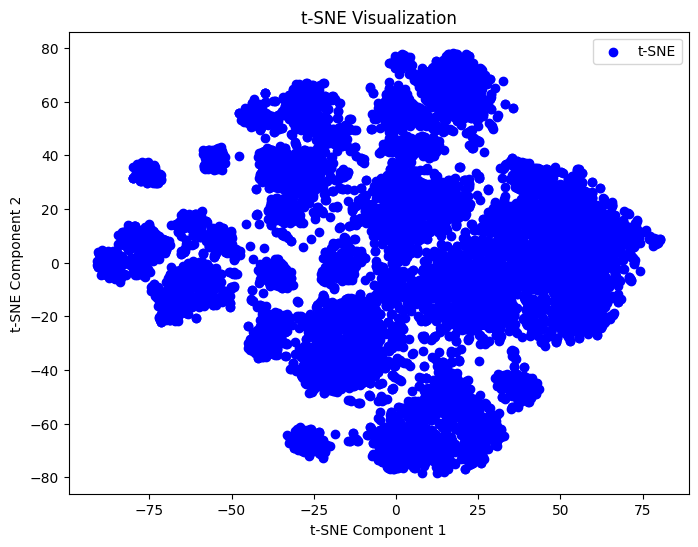

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='b', marker='o', label='t-SNE')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

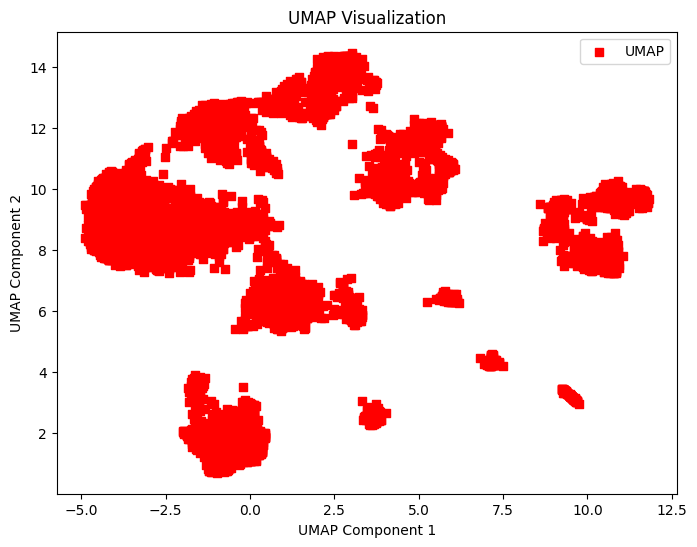

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c='r', marker='s', label='UMAP')
plt.title('UMAP Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.show()

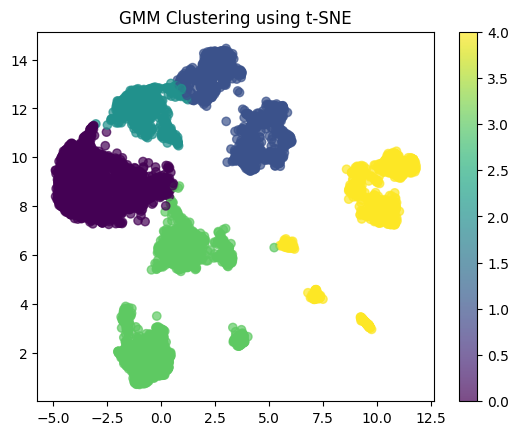

In [21]:
n_clusters = 5

gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(umap_result)

df['GMM_Cluster_UMAP'] = gmm_labels

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=gmm_labels, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('GMM Clustering using t-SNE')
plt.show()

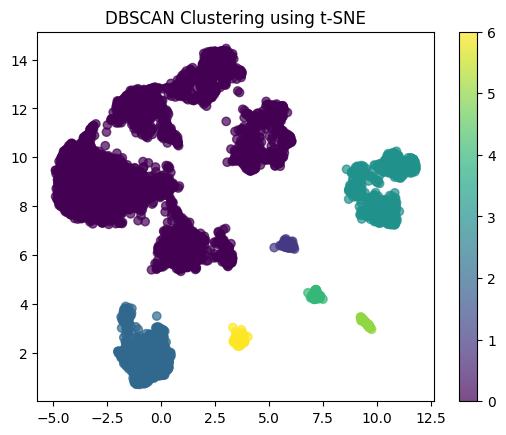

In [22]:
eps = 0.8
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(umap_result)

df['DBSCAN_Cluster'] = dbscan_labels

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('DBSCAN Clustering using t-SNE')
plt.show()

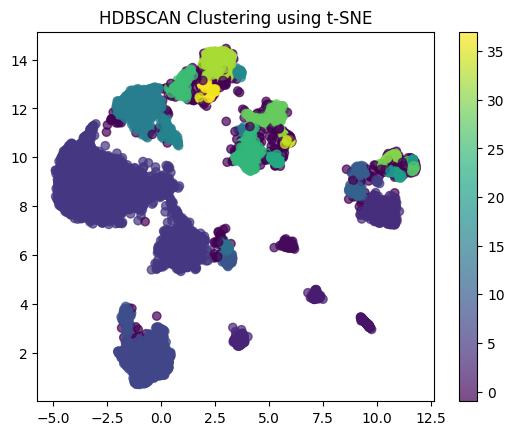

In [23]:
min_cluster_size = 5

hdb = hdbscan.HDBSCAN(min_samples=min_cluster_size)
hdb_labels = hdb.fit_predict(umap_result)

df['HDBSCAN_Cluster'] = hdb_labels

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=hdb_labels, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('HDBSCAN Clustering using t-SNE')
plt.show()

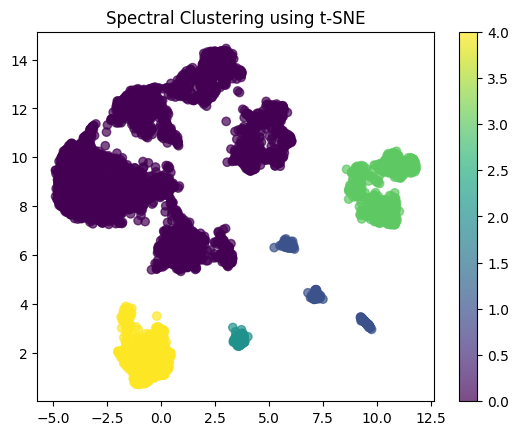

In [25]:
n_clusters = 5

spectral_clustering = SpectralClustering(n_clusters=n_clusters, eigen_solver='arpack', random_state=42)
spectral_labels = spectral_clustering.fit_predict(umap_result)

df['Spectral_Cluster'] = spectral_labels

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=spectral_labels, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('Spectral Clustering using t-SNE')
plt.show()

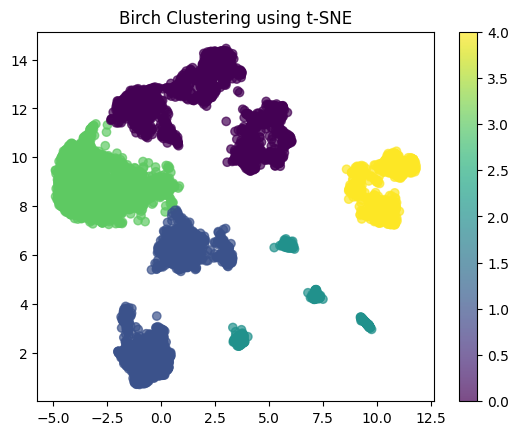

In [26]:
n_clusters = 5

birch = Birch(n_clusters=n_clusters)
birch_labels = birch.fit_predict(umap_result)

df['Birch_Cluster'] = birch_labels

# Plotting the Birch clusters in 2D (assuming tsne_result, you can use umap_result as well)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=birch_labels, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('Birch Clustering using t-SNE')
plt.show()

d:\workspace\github\icu-flow-prediction\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


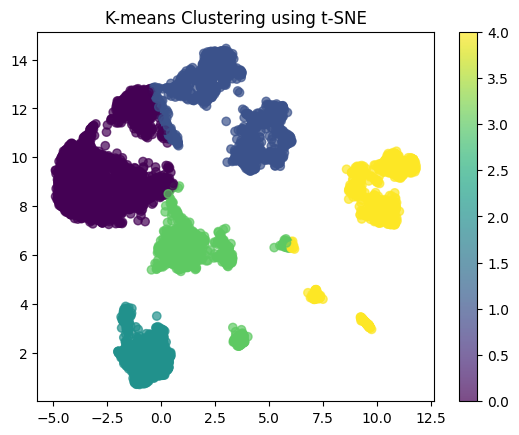

In [27]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(umap_result)

df['KMeans_Cluster'] = kmeans_labels

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('K-means Clustering using t-SNE')
plt.show()

In [29]:
average_mortality = df.groupby('KMeans_Cluster')['mr_lods'].mean()

print("Average Mortality Rate for Each Cluster:")
print(average_mortality)

Average Mortality Rate for Each Cluster:
KMeans_Cluster
0    0.408073
1    0.295284
2    0.154093
3    0.182069
4    0.283862
Name: icu_level, dtype: float64


In [ ]:
median_mortality = df.groupby('Birch_Cluster')['mr_lods'].median()

print("Median Mortality Rate for Each Cluster:")
print(median_mortality)

In [ ]:
df["icu_level"]

In [ ]:
num_clusters = len(average_mortality)
colors = ['grey'] * num_clusters

colors[2] = 'blue'
colors[4] = 'red'

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=[colors[label] for label in df["KMeans_Cluster"]], alpha=0.7)

plt.colorbar()
plt.title('KMeans Clustering using t-SNE')
plt.show()

In [ ]:
# Define colors for each ICU level
icu_level_colors = {
    'Level 1': 'lightgrey',
    'Level 2': 'blue',
    'Level 3': 'red'
}

# Create a list of colors for each data point based on the 'icu_level' column
colors_by_icu_level = [icu_level_colors[level] for level in df['icu_level']]

# Plot the scatter plot with colors based on 'icu_level'
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=colors_by_icu_level, marker='.', alpha=0.7)

plt.colorbar()
plt.title('ICU Level Colored Clustering using t-SNE')
plt.show()